In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [2]:
base_dir = '/kaggle/input/data-cnn2'
img_height, img_width = 224, 224  
batch_size = 32  

In [3]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [4]:
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

Found 20686 images belonging to 11 classes.


In [5]:
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 5165 images belonging to 11 classes.


In [6]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout

def create_model(img_height, img_width, num_classes):
    model = Sequential([
        Input(shape=(img_height, img_width, 3)),  # ✅ Fix lỗi input_shape

        # 1st Convolutional Block
        Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(),

        # 2nd Convolutional Block
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # 3rd Convolutional Block
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),

        # 4th Convolutional Block
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # 5th Convolutional Block
        Conv2D(256, (3, 3), activation='relu'),
        BatchNormalization(),

        # 6th Convolutional Block
        Conv2D(256, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # 7th Convolutional Block
        Conv2D(512, (3, 3), activation='relu'),
        BatchNormalization(),

        # 8th Convolutional Block
        Conv2D(512, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Flatten Layer
        Flatten(),

        # Dense Layers
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # ✅ Dùng biến num_classes
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [7]:
img_height = 224
img_width = 224
num_classes = 11  

model = create_model(img_height, img_width, num_classes)  # ✅ Đã truyền đủ tham số


In [8]:

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

In [9]:
history = model.fit(
    train_generator,
    epochs=200, 
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)
model.save("final_tomato_model2.h5")


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


647/647 ━━━━━━━━━━━━━━━━━━━━ 496s 705ms/step - accuracy: 0.1631 - loss: 11.7803 - val_accuracy: 0.2614 - val_loss: 2.0878 - learning_rate: 0.0010
Epoch 2/200
647/647 ━━━━━━━━━━━━━━━━━━━━ 311s 476ms/step - accuracy: 0.2268 - loss: 2.1704 - val_accuracy: 0.3317 - val_loss: 1.9723 - learning_rate: 0.0010
Epoch 3/200
647/647 ━━━━━━━━━━━━━━━━━━━━ 310s 475ms/step - accuracy: 0.2379 - loss: 2.1090 - val_accuracy: 0.2465 - val_loss: 2.2230 - learning_rate: 0.0010
Epoch 4/200
647/647 ━━━━━━━━━━━━━━━━━━━━ 313s 479ms/step - accuracy: 0.2432 - loss: 2.0687 - val_accuracy: 0.2298 - val_loss: 2.0800 - learning_rate: 0.0010
Epoch 5/200
647/647 ━━━━━━━━━━━━━━━━━━━━ 305s 467ms/step - accuracy: 0.2571 - loss: 2.0333 - val_accuracy: 0.2579 - val_loss: 2.0299 - learning_rate: 0.0010
Epoch 6/200
647/647 ━━━━━━━━━━━━━━━━━━━━ 304s 466ms/step - accuracy: 0.2747 - loss: 1.9807 - val_accuracy: 0.2958 - val_loss: 1.9362 - learning_rate: 0.0010
Epoch 7/200
647/647 ━━━━━━━━━━━━━━━━━━━━ 307s 470ms/step - accuracy: 

In [10]:
!zip -r output2.zip /kaggle/working/


  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/best_model.keras (deflated 20%)
  adding: kaggle/working/final_tomato_model2.h5 (deflated 20%)
  adding: kaggle/working/__notebook__.ipynb (deflated 98%)


In [11]:

from tensorflow.keras.models import load_model

# Load best model
best_model = load_model('/kaggle/working/best_model.keras')

# Load final model
final_model = load_model('/kaggle/working/final_tomato_model2.h5')


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = "/kaggle/input/data-cnn2"  # Thay bằng đường dẫn đúng

# Chỉ cần rescale ảnh, không cần augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),  # Giống input của model
    batch_size=32,  
    class_mode='categorical',  # Phù hợp với loss function `categorical_crossentropy`
    shuffle=False  # Không shuffle để giữ đúng thứ tự label
)


Found 25851 images belonging to 11 classes.


In [13]:
test_loss_best, test_acc_best = best_model.evaluate(test_generator)
test_loss_final, test_acc_final = final_model.evaluate(test_generator)

print(f"Best Model - Loss: {test_loss_best}, Accuracy: {test_acc_best}")
print(f"Final Model - Loss: {test_loss_final}, Accuracy: {test_acc_final}")


808/808 ━━━━━━━━━━━━━━━━━━━━ 98s 120ms/step - accuracy: 0.9017 - loss: 0.2945
808/808 ━━━━━━━━━━━━━━━━━━━━ 86s 105ms/step - accuracy: 0.9017 - loss: 0.2945
Best Model - Loss: 0.27468252182006836, Accuracy: 0.9092491865158081
Final Model - Loss: 0.27468252182006836, Accuracy: 0.9092491865158081


In [14]:
from sklearn.metrics import classification_report

# Predict labels
y_true = test_generator.classes  # Ground truth labels
y_pred_best = best_model.predict(test_generator).argmax(axis=1)
y_pred_final = final_model.predict(test_generator).argmax(axis=1)

# Evaluation
print("📌 Best Model Metrics:")
print(classification_report(y_true, y_pred_best))

print("📌 Final Model Metrics:")
print(classification_report(y_true, y_pred_final))


808/808 ━━━━━━━━━━━━━━━━━━━━ 85s 105ms/step
808/808 ━━━━━━━━━━━━━━━━━━━━ 84s 103ms/step
📌 Best Model Metrics:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      2826
           1       0.93      0.91      0.92      2455
           2       0.81      0.89      0.85      3113
           3       0.91      0.89      0.90      2754
           4       0.84      0.88      0.86      2882
           5       0.99      0.95      0.97      1747
           6       0.92      0.97      0.94      1827
           7       0.98      0.97      0.98      2039
           8       0.99      0.95      0.97      2153
           9       0.95      0.98      0.97      3051
          10       0.87      0.60      0.71      1004

    accuracy                           0.91     25851
   macro avg       0.92      0.90      0.90     25851
weighted avg       0.91      0.91      0.91     25851

📌 Final Model Metrics:
              precision    recall  f1-score   support


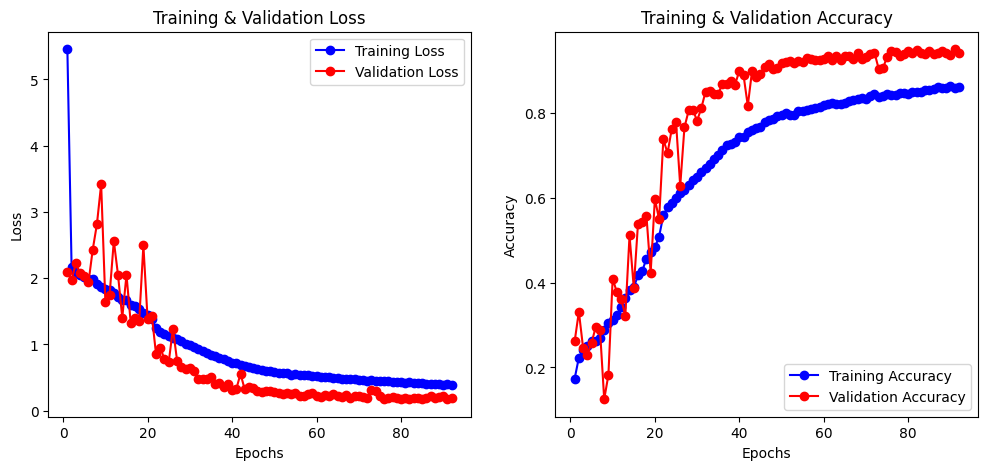

In [15]:
import matplotlib.pyplot as plt

# Giả sử history là kết quả từ model.fit()
history_dict = history.history

# Trích xuất giá trị Loss và Accuracy
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# Vẽ biểu đồ Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Vẽ biểu đồ Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()


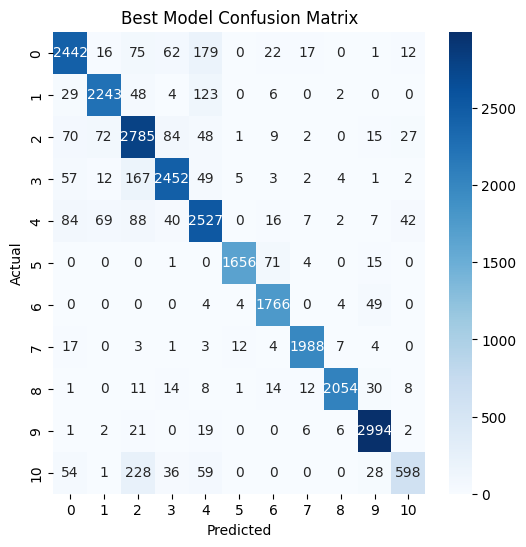

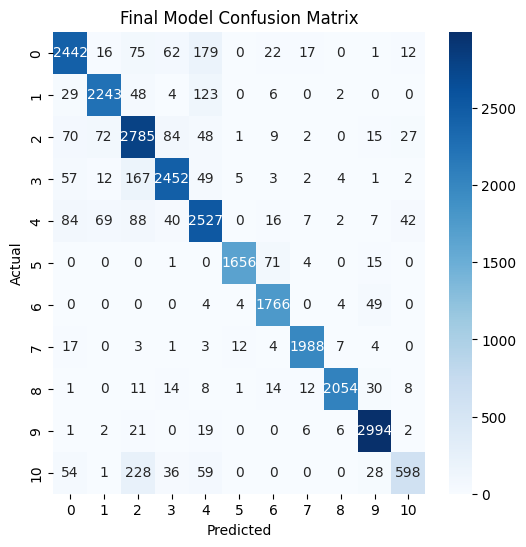

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_true, y_pred_best, "Best Model Confusion Matrix")
plot_confusion_matrix(y_true, y_pred_final, "Final Model Confusion Matrix")


In [17]:
import numpy as np
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

808/808 ━━━━━━━━━━━━━━━━━━━━ 85s 105ms/step


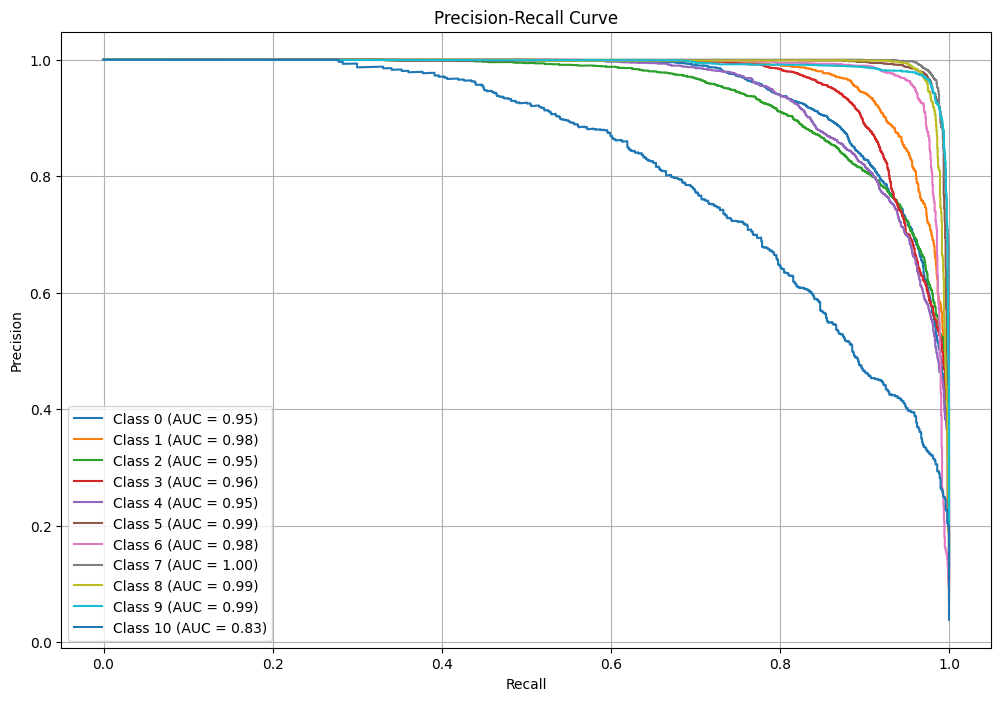

In [18]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

y_true = test_generator.classes
y_true_bin = label_binarize(y_true, classes=range(len(test_generator.class_indices)))
y_pred_bin = y_pred
precision = dict()
recall = dict()
pr_auc = dict()

plt.figure(figsize=(12, 8))
for i in range(y_true_bin.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_pred_bin[:, i])
    pr_auc[i] = auc(recall[i], precision[i])
    plt.plot(recall[i], precision[i], label=f'Class {i} (AUC = {pr_auc[i]:0.2f})')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.grid(True)
plt.show()

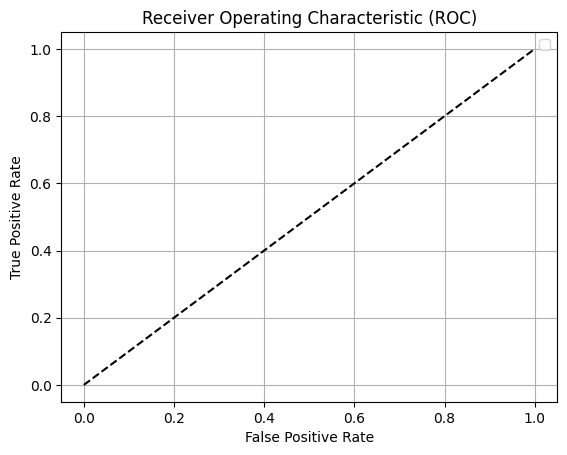

In [19]:
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(True)
plt.show()

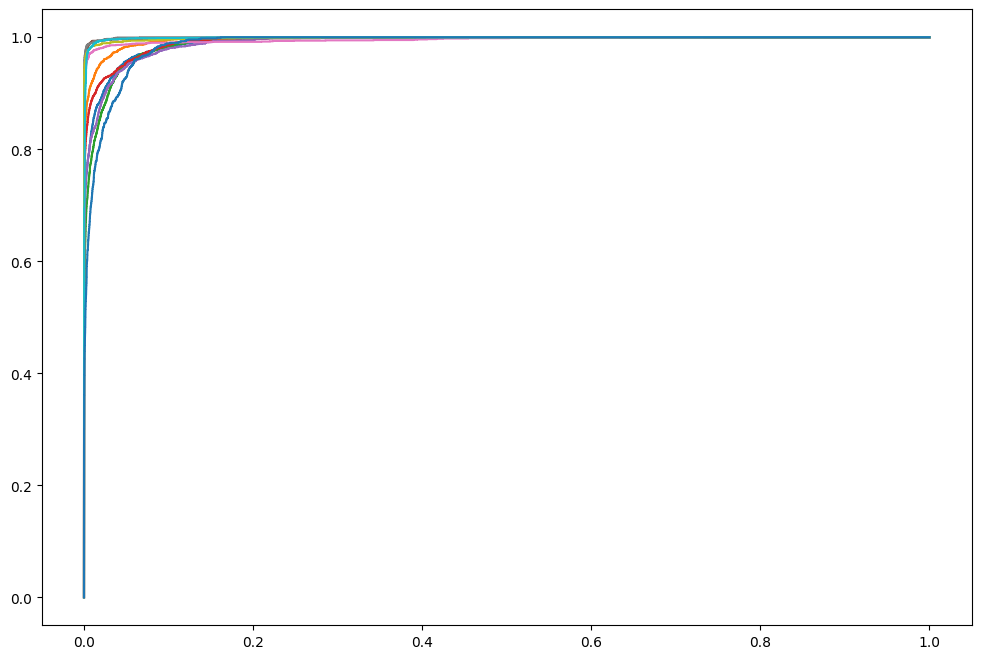

In [20]:
from sklearn.metrics import roc_curve

fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(12, 8))
for i in range(y_true_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')